In [ ]:
!pip install opencv-python

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

--2025-04-12 16:25:48--  https://drive.usercontent.google.com/u/0/uc?id=1OOkdQMc7Ex6WdJPMUktg8bk1WCK4vZM4
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.122.132, 2607:f8b0:4004:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.122.132|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.usercontent.google.com/uc?id=1OOkdQMc7Ex6WdJPMUktg8bk1WCK4vZM4 [following]
--2025-04-12 16:25:48--  https://drive.usercontent.google.com/uc?id=1OOkdQMc7Ex6WdJPMUktg8bk1WCK4vZM4
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1OOkdQMc7Ex6WdJPMUktg8bk1WCK4vZM4 [following]
--2025-04-12 16:25:48--  https://drive.usercontent.google.com/download?id=1OOkdQMc7Ex6WdJPMUktg8bk1WCK4vZM4
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, await

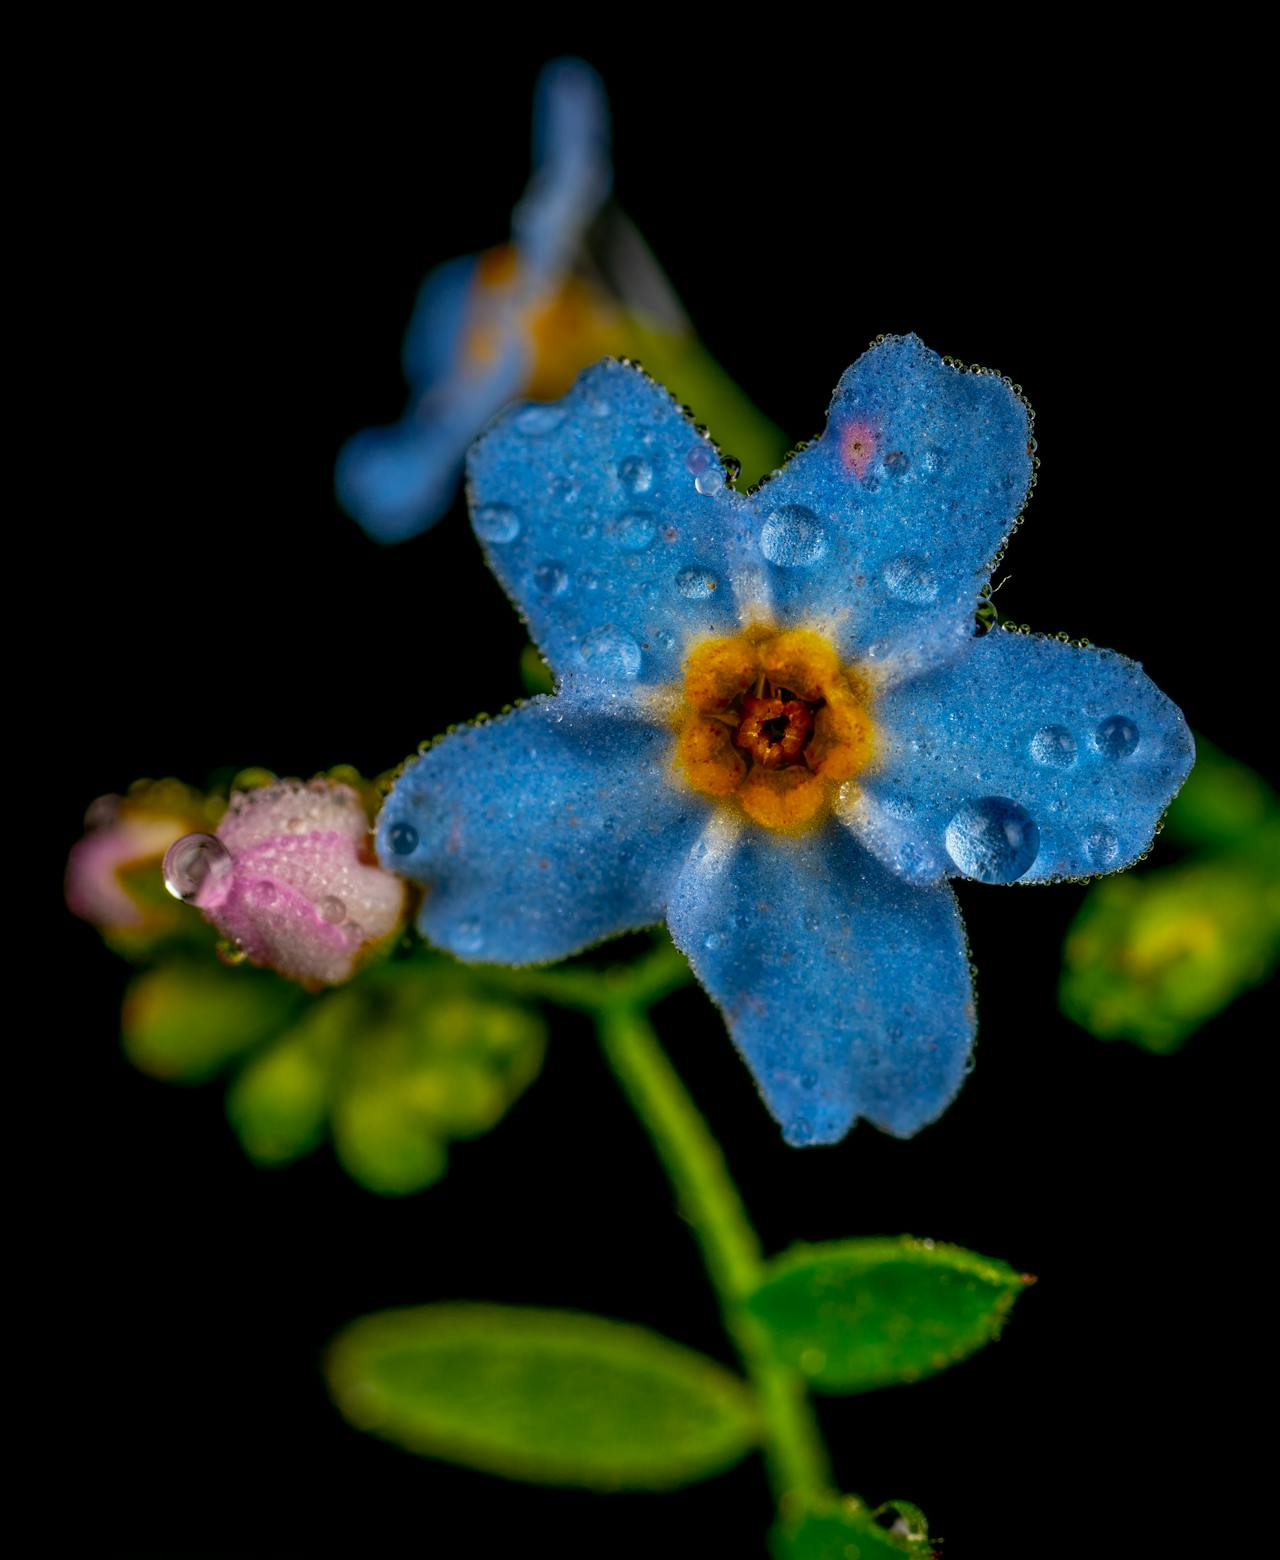

In [ ]:
!wget -O flor.jpg https://drive.usercontent.google.com/u/0/uc?id=1OOkdQMc7Ex6WdJPMUktg8bk1WCK4vZM4&export=download


# Load the image
image = cv2.imread('flor.jpg')
cv2_imshow(image)


#Trabajo con canales HSV

**Explicación de los canales HSV:**

**H (Hue):** Representa el tono o color puro. Varía de 0 a 180 grados, donde 0 es rojo, 60 es amarillo, 120 es verde, etc.

**S (Saturation):** Representa la intensidad o pureza del color. Varía de 0 a 255, donde 0 es gris (sin color) y 255 es el color puro.

**V (Value):** Representa el brillo o la luminosidad del color. Varía de 0 a 255, donde 0 es negro y 255 es blanco.

**Efecto de cada canal:**

- Modificar el canal H cambia el tono del color.
- Modificar el canal S cambia la intensidad del color.
- Modificar el canal V cambia el brillo del color.

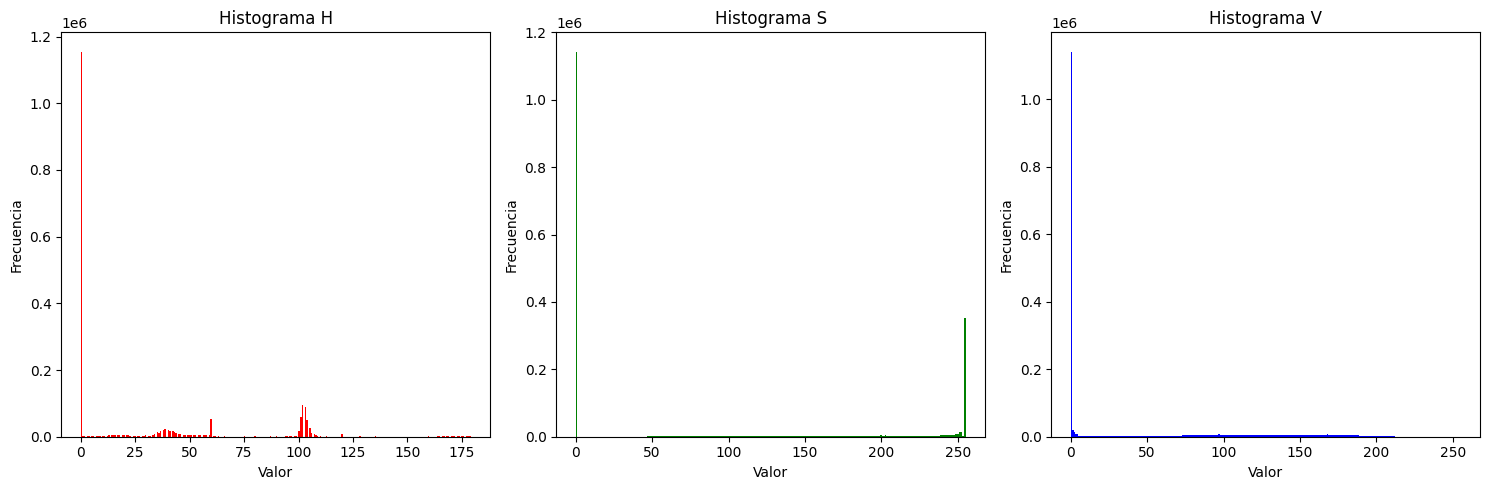

In [ ]:
# Convierto a HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# separo los canales
h, s, v = cv2.split(hsv_image)

# Crear el histograma
# Crear histogramas individuales para cada canal
plt.figure(figsize=(15, 5))  # Ajustar el tamaño de la figura si es necesario

# Histograma para el canal H
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, primer subplot
plt.hist(h.ravel(), bins=256, color='red')
plt.title('Histograma H')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal S
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, segundo subplot
plt.hist(s.ravel(), bins=256, color='green')
plt.title('Histograma S')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal V
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, tercer subplot
plt.hist(v.ravel(), bins=256, color='blue')
plt.title('Histograma V')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')


plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()  # Mostrar los histogramas


## Modifico la *Saturacion*

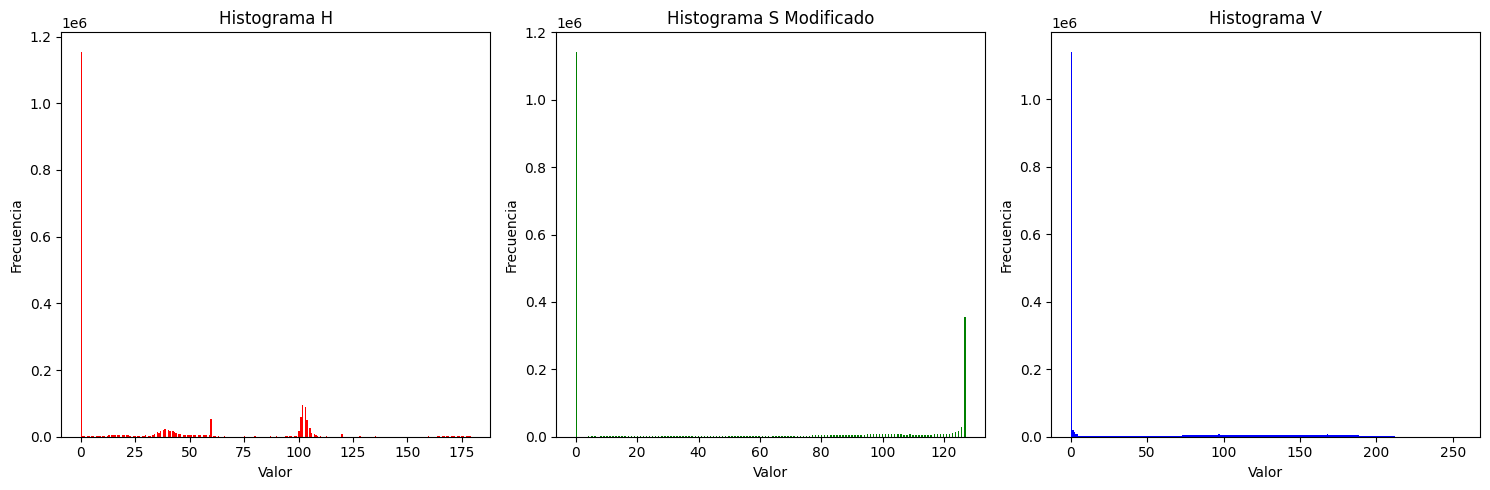

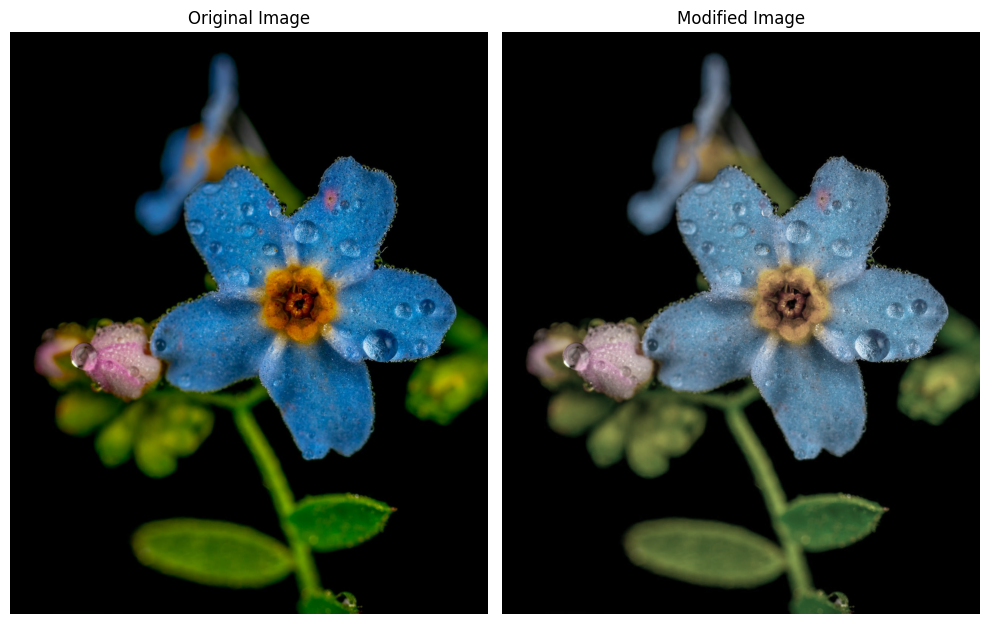

In [ ]:
# Bajo la saturacion
s_modified = np.clip(s * 0.5, 0, 255).astype(np.uint8)
hsv_modified = cv2.merge((h, s_modified, v))

# Vuelvo a convertir a BGR
bgr_modified = cv2.cvtColor(hsv_modified, cv2.COLOR_HSV2BGR)

# Crear histogramas individuales para cada canal
plt.figure(figsize=(15, 5))  # Ajustar el tamaño de la figura si es necesario

# Histograma para el canal H
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, primer subplot
plt.hist(h.ravel(), bins=256, color='red')
plt.title('Histograma H')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal S
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, segundo subplot
plt.hist(s_modified.ravel(), bins=256, color='green')
plt.title('Histograma S Modificado')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal V
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, tercer subplot
plt.hist(v.ravel(), bins=256, color='blue')
plt.title('Histograma V')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')


plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()  # Mostrar los histogramas


# Muestro ambas imagenes
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_modified_rgb = cv2.cvtColor(bgr_modified, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_modified_rgb)
plt.title('Modified Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Modifico el *Hue*

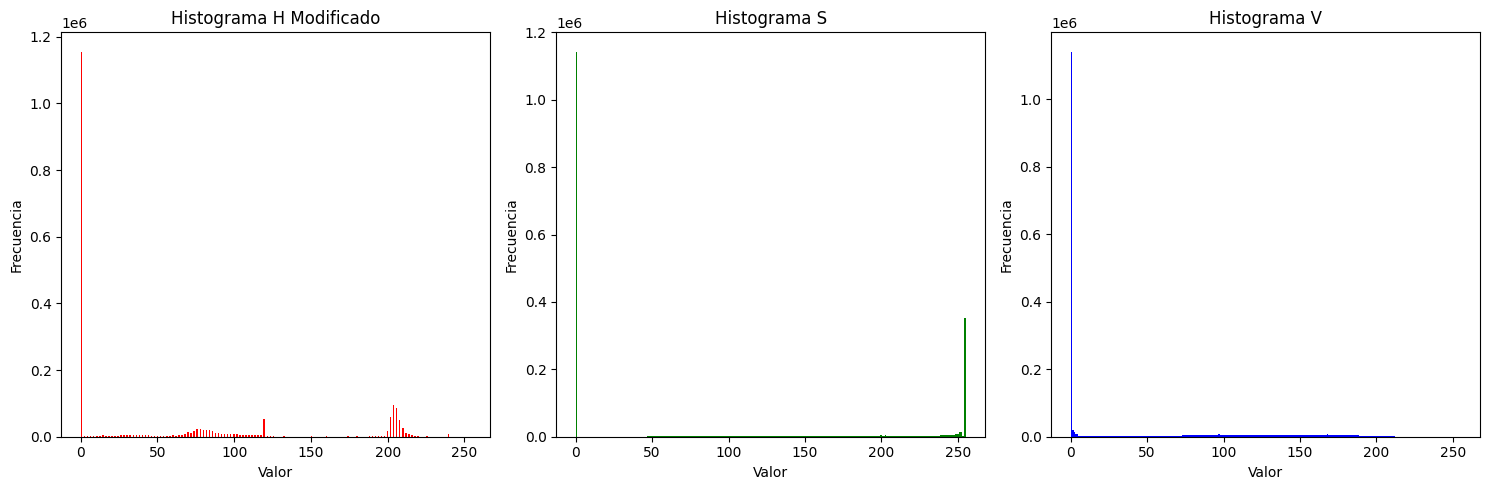

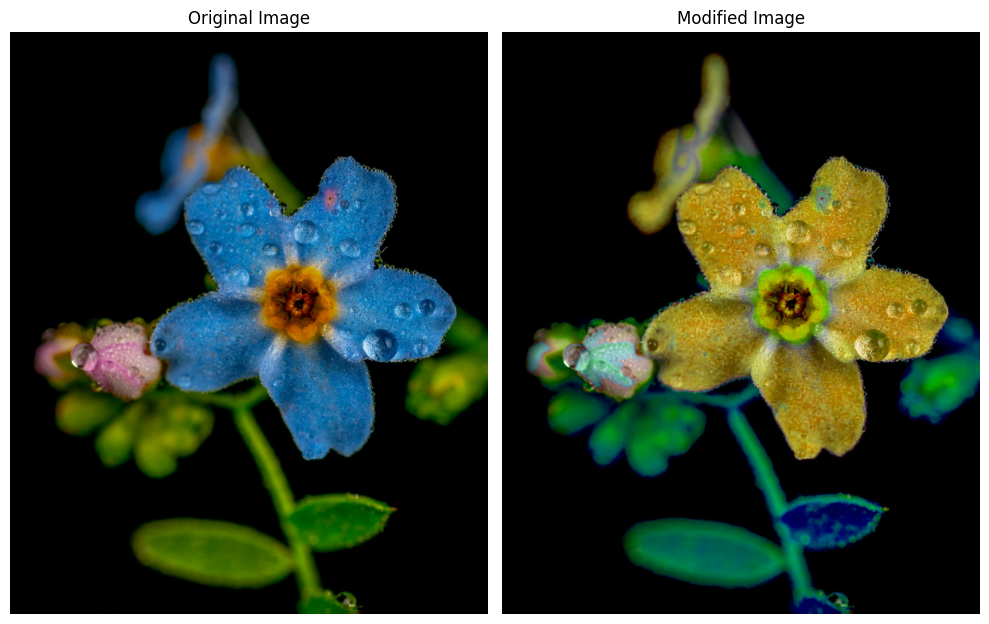

In [ ]:
# Modifico el Hue
h_modified = np.clip(h * 2, 0, 255).astype(np.uint8)
hsv_modified = cv2.merge((h_modified, s, v))

# Vuelvo a convertir a BGR
bgr_modified = cv2.cvtColor(hsv_modified, cv2.COLOR_HSV2BGR)

# Crear histogramas individuales para cada canal
plt.figure(figsize=(15, 5))  # Ajustar el tamaño de la figura si es necesario

# Histograma para el canal H
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, primer subplot
plt.hist(h_modified.ravel(), bins=256, color='red')
plt.title('Histograma H Modificado')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal S
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, segundo subplot
plt.hist(s.ravel(), bins=256, color='green')
plt.title('Histograma S')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal V
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, tercer subplot
plt.hist(v.ravel(), bins=256, color='blue')
plt.title('Histograma V')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')


plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()  # Mostrar los histogramas

# Muestro ambas imagenes
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_modified_rgb = cv2.cvtColor(bgr_modified, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_modified_rgb)
plt.title('Modified Image')
plt.axis('off')

plt.tight_layout()
plt.show()

##Modifico el *Brillo*

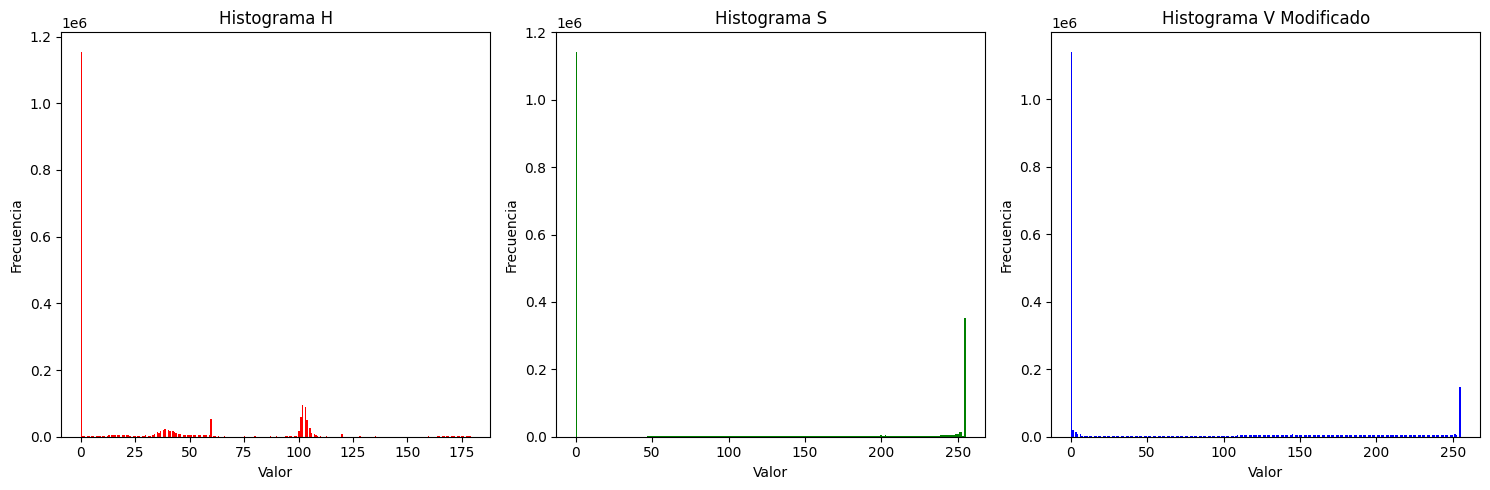

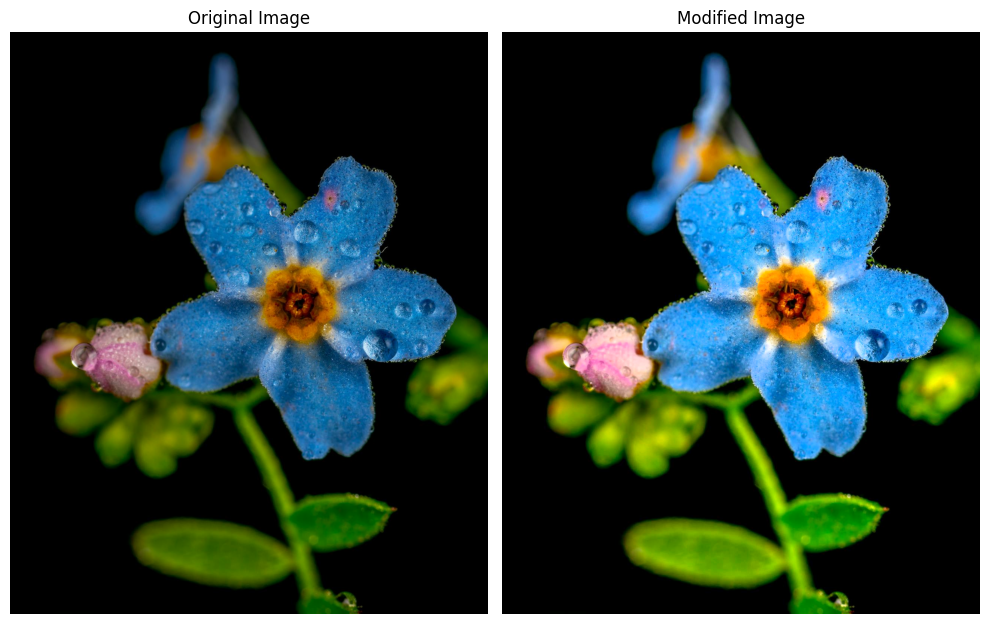

In [ ]:
# Modifico el Brillo
v_modified = np.clip(v * 1.5, 0, 255).astype(np.uint8)
hsv_modified = cv2.merge((h, s, v_modified))

# Vuelvo a convertir a BGR
bgr_modified = cv2.cvtColor(hsv_modified, cv2.COLOR_HSV2BGR)

# Crear histogramas individuales para cada canal
plt.figure(figsize=(15, 5))  # Ajustar el tamaño de la figura si es necesario

# Histograma para el canal H
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, primer subplot
plt.hist(h.ravel(), bins=256, color='red')
plt.title('Histograma H')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal S
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, segundo subplot
plt.hist(s.ravel(), bins=256, color='green')
plt.title('Histograma S')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal V
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, tercer subplot
plt.hist(v_modified.ravel(), bins=256, color='blue')
plt.title('Histograma V Modificado')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')


plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()  # Mostrar los histogramas

# Muestro ambas imagenes
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_modified_rgb = cv2.cvtColor(bgr_modified, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_modified_rgb)
plt.title('Modified Image')
plt.axis('off')

plt.tight_layout()
plt.show()

#Trabajo con canales YUV
**Explicación de los canales YUV:**

**Y (Luminancia):** Representa el brillo o la intensidad de la luz.

**U (Crominancia azul):** Representa la diferencia entre el azul y la luminancia.

**V (Crominancia roja):** Representa la diferencia entre el rojo y la luminancia.

**Efecto de cada canal:**

- Modificar el canal Y cambia el brillo de la imagen.
- Modificar el canal U cambia el balance de color entre azul y amarillo.
- Modificar el canal V cambia el balance de color entre rojo y cian.

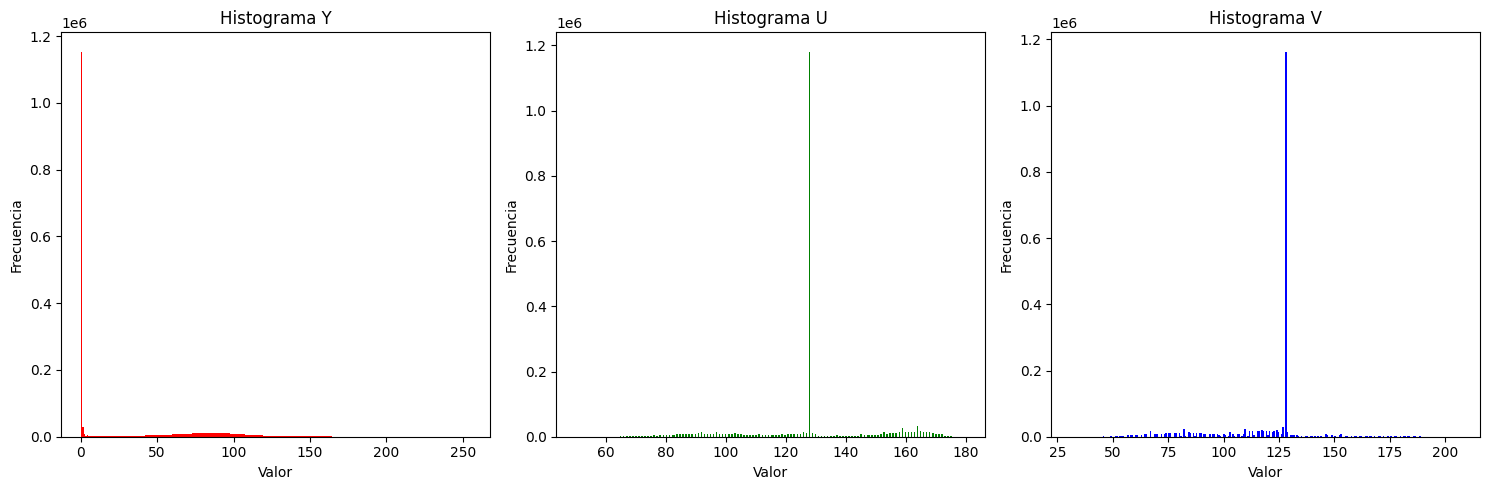

In [ ]:
# Convertir a YUV
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# separo los canales
y, u, v = cv2.split(image_yuv)

# Crear el histograma
# Crear histogramas individuales para cada canal
plt.figure(figsize=(15, 5))  # Ajustar el tamaño de la figura si es necesario

# Histograma para el canal Y
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, primer subplot
plt.hist(y.ravel(), bins=256, color='red')
plt.title('Histograma Y')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal U
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, segundo subplot
plt.hist(u.ravel(), bins=256, color='green')
plt.title('Histograma U')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal V
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, tercer subplot
plt.hist(v.ravel(), bins=256, color='blue')
plt.title('Histograma V')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')


plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()  # Mostrar los histogramas

## Modifico el *brillo u contraste* con el canal Y

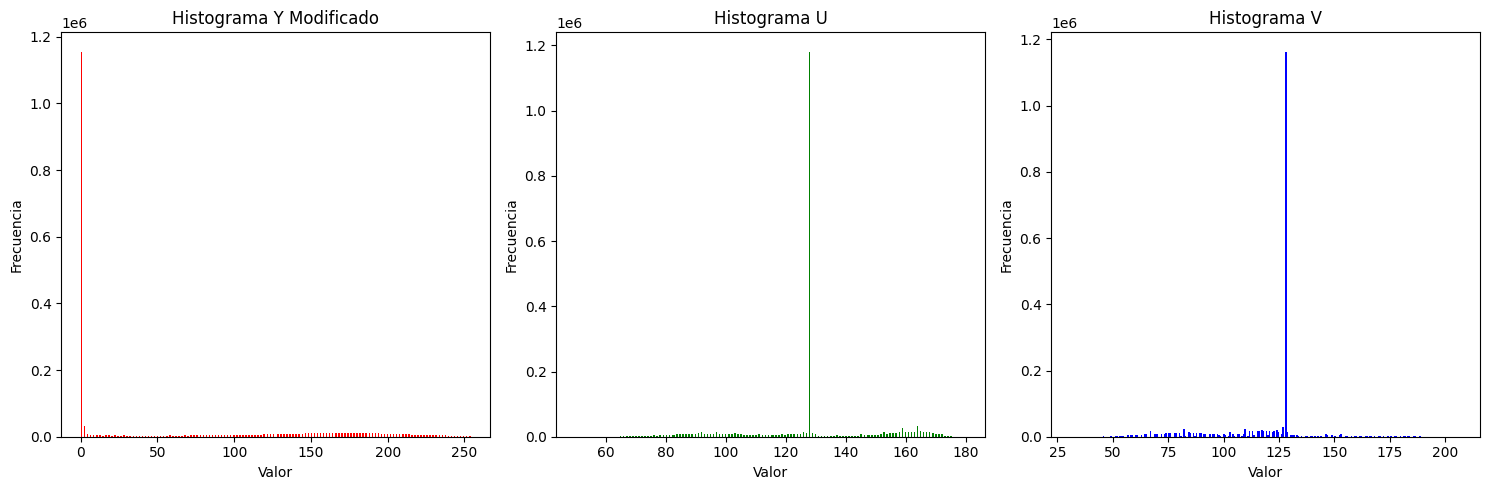

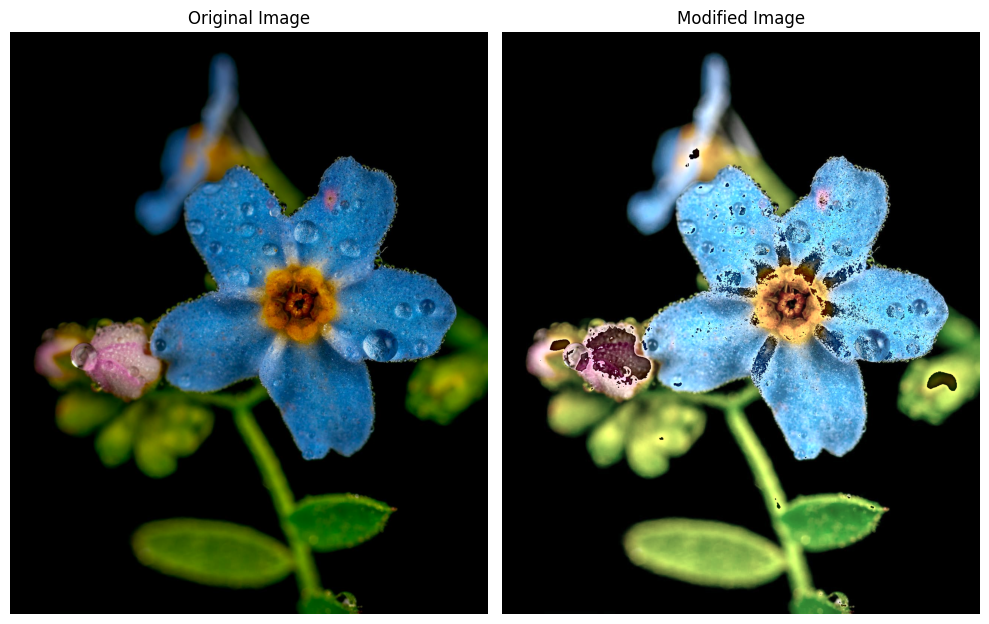

In [ ]:
# Aumento el brillo
y_modified = np.clip(y * 2, 0, 255).astype(np.uint8)
yuv_modified = cv2.merge((y_modified, u, v))

# Vuelvo a convertir a BGR
bgr_modified = cv2.cvtColor(yuv_modified, cv2.COLOR_YUV2BGR)

# Crear histogramas individuales para cada canal
plt.figure(figsize=(15, 5))  # Ajustar el tamaño de la figura si es necesario

# Histograma para el canal Y
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, primer subplot
plt.hist(y_modified.ravel(), bins=256, color='red')
plt.title('Histograma Y Modificado')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal U
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, segundo subplot
plt.hist(u.ravel(), bins=256, color='green')
plt.title('Histograma U')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal V
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, tercer subplot
plt.hist(v.ravel(), bins=256, color='blue')
plt.title('Histograma V')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')


plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()  # Mostrar los histogramas


# Muestro ambas imagenes
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_modified_rgb = cv2.cvtColor(bgr_modified, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_modified_rgb)
plt.title('Modified Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Modifico el el *canal U*

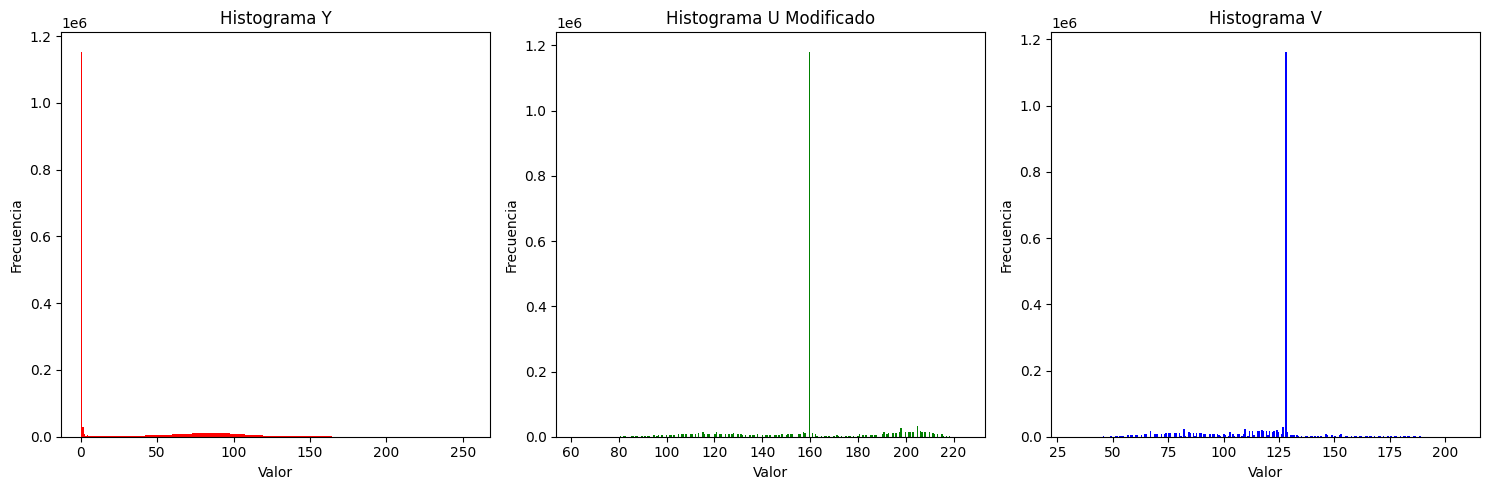

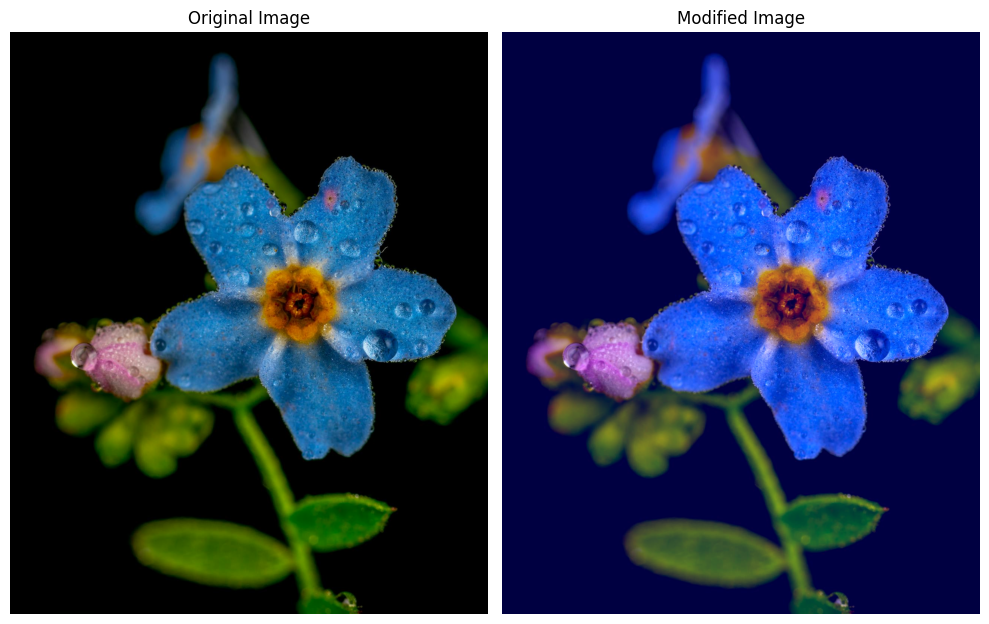

In [ ]:
# Modifico el croma Azul
u_modified = np.clip(u * 1.25, 0, 255).astype(np.uint8)
yuv_modified = cv2.merge((y, u_modified, v))

# Vuelvo a convertir a BGR
bgr_modified = cv2.cvtColor(yuv_modified, cv2.COLOR_YUV2BGR)

# Crear histogramas individuales para cada canal
plt.figure(figsize=(15, 5))  # Ajustar el tamaño de la figura si es necesario

# Histograma para el canal Y
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, primer subplot
plt.hist(y.ravel(), bins=256, color='red')
plt.title('Histograma Y')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal U
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, segundo subplot
plt.hist(u_modified.ravel(), bins=256, color='green')
plt.title('Histograma U Modificado')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal V
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, tercer subplot
plt.hist(v.ravel(), bins=256, color='blue')
plt.title('Histograma V')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')


plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()  # Mostrar los histogramas


# Muestro ambas imagenes
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_modified_rgb = cv2.cvtColor(bgr_modified, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_modified_rgb)
plt.title('Modified Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Modifico el *canal V*

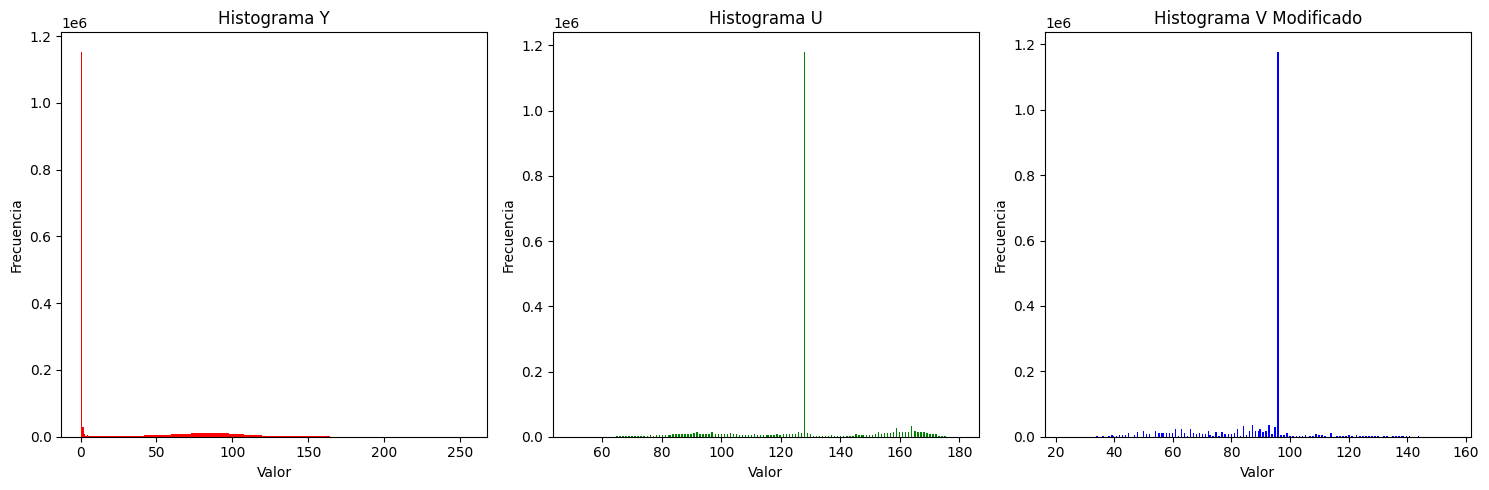

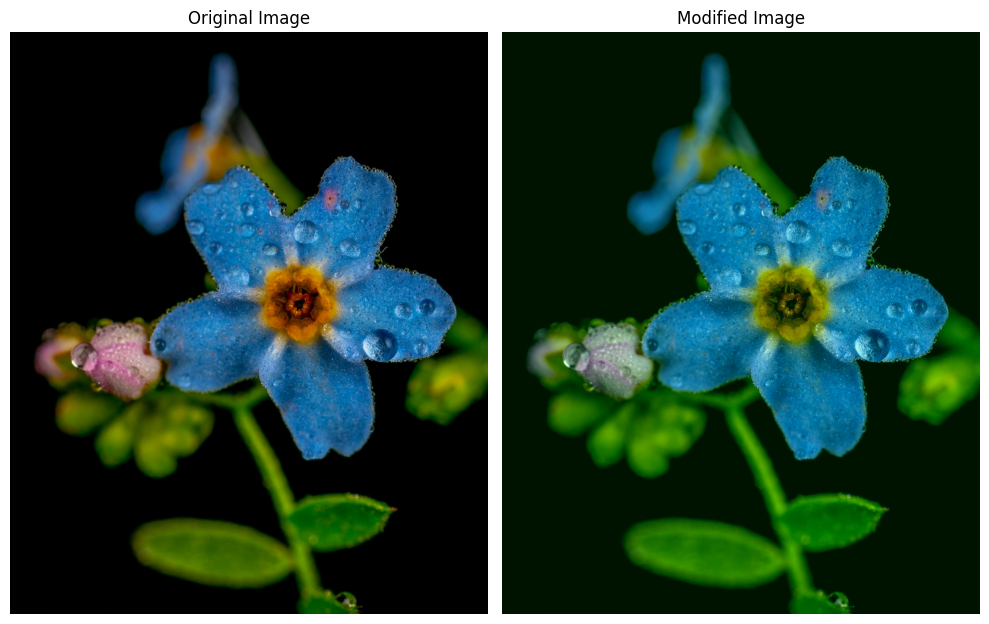

In [ ]:
# Modifico el croma Rojo
v_modified = np.clip(v * 0.75, 0, 255).astype(np.uint8)
yuv_modified = cv2.merge((y, u, v_modified))

# Vuelvo a convertir a BGR
bgr_modified = cv2.cvtColor(yuv_modified, cv2.COLOR_YUV2BGR)

# Crear histogramas individuales para cada canal
plt.figure(figsize=(15, 5))  # Ajustar el tamaño de la figura si es necesario

# Histograma para el canal Y
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, primer subplot
plt.hist(y.ravel(), bins=256, color='red')
plt.title('Histograma Y')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal U
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, segundo subplot
plt.hist(u.ravel(), bins=256, color='green')
plt.title('Histograma U')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal V
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, tercer subplot
plt.hist(v_modified.ravel(), bins=256, color='blue')
plt.title('Histograma V Modificado')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')


plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()  # Mostrar los histogramas


# Muestro ambas imagenes
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_modified_rgb = cv2.cvtColor(bgr_modified, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_modified_rgb)
plt.title('Modified Image')
plt.axis('off')

plt.tight_layout()
plt.show()

#Trabajo con Modelo HLS
**Explicación de los canales HLS:**

**H (Hue):** Representa el tono o color puro. Es similar al canal H en HSV.

**L (Lightness):** Representa la luminosidad o brillo. Es similar al canal V en HSV, pero con un rango diferente.

**S (Saturation):** Representa la intensidad o pureza del color. Es similar al canal S en HSV.

**Efecto de cada canal:**

- Modificar el canal H cambia el tono del color.
- Modificar el canal L cambia el brillo de la imagen.
- Modificar el canal S cambia la intensidad del color.

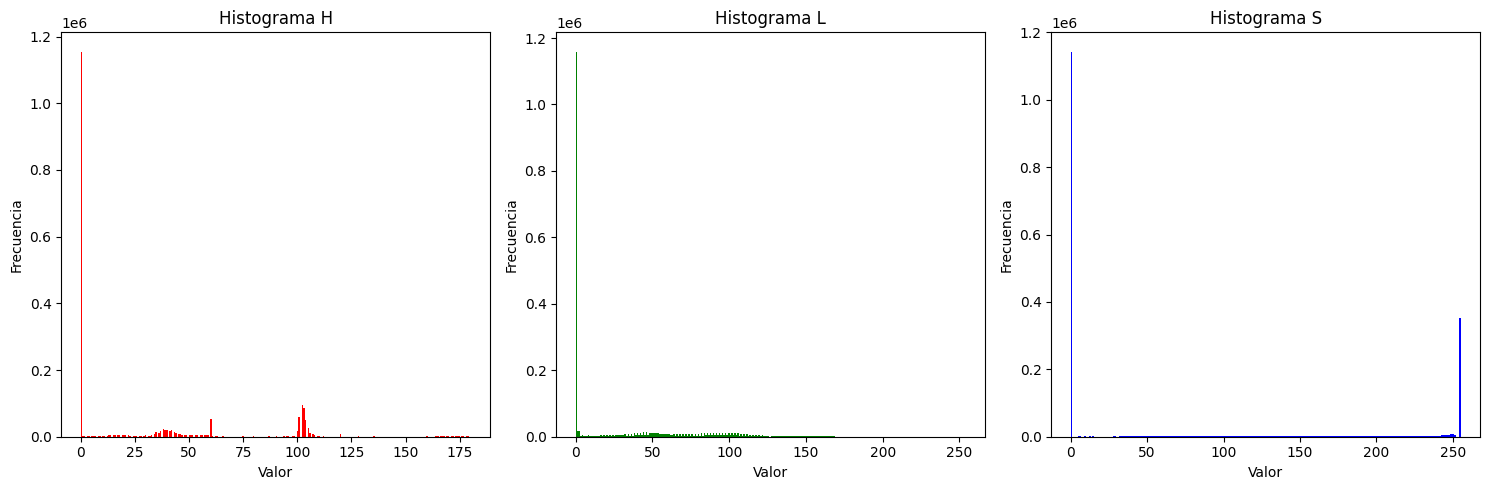

In [ ]:
# Convierto a HLS
hls_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

# separo los canales
h, l, s = cv2.split(hls_image)

# Crear el histograma
# Crear histogramas individuales para cada canal
plt.figure(figsize=(15, 5))  # Ajustar el tamaño de la figura si es necesario

# Histograma para el canal H
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, primer subplot
plt.hist(h.ravel(), bins=256, color='red')
plt.title('Histograma H')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal L
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, segundo subplot
plt.hist(l.ravel(), bins=256, color='green')
plt.title('Histograma L')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal S
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, tercer subplot
plt.hist(s.ravel(), bins=256, color='blue')
plt.title('Histograma S')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')


plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()  # Mostrar los histogramas

## Modifico el *canal L*
Los canales h y s son análogos a los del modelo hsv

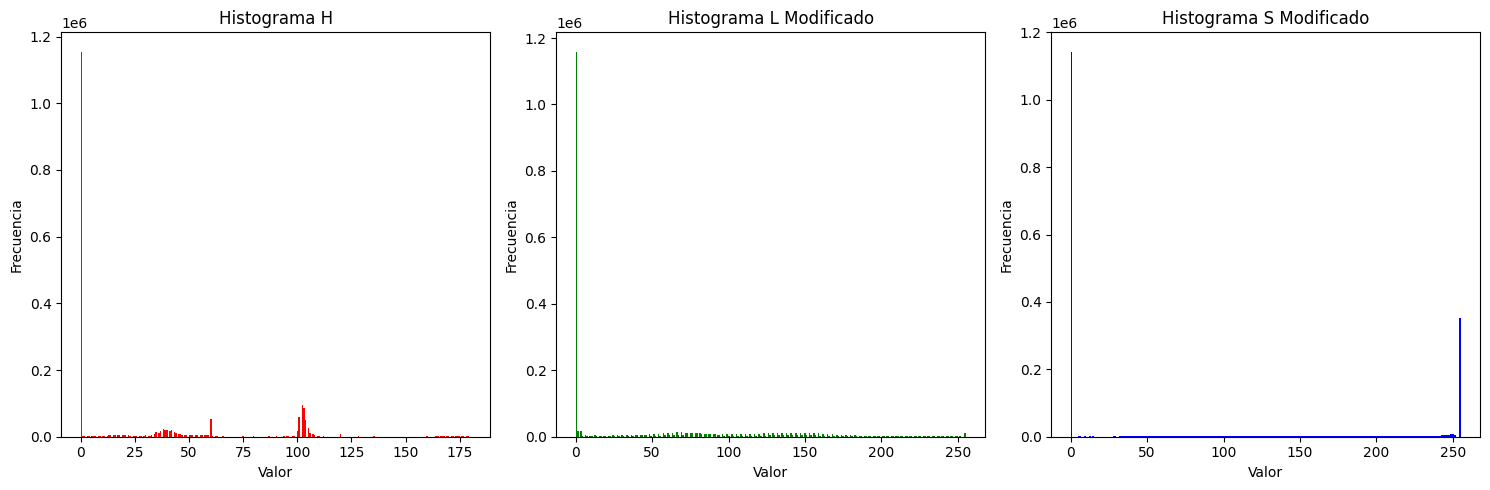

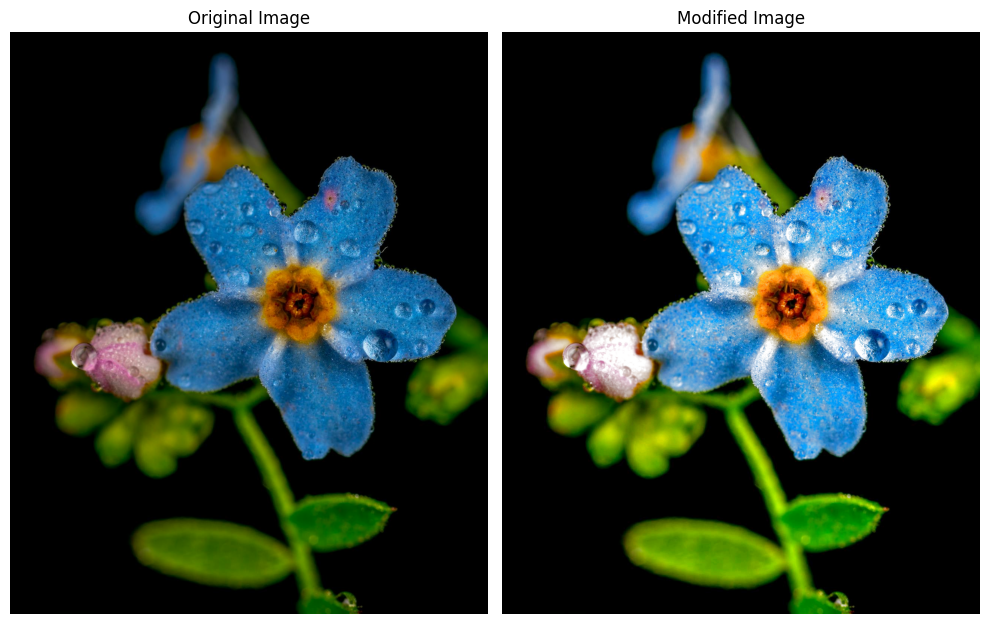

In [ ]:
# Modifico la luminosidad
l_modified = np.clip(l * 1.5, 0, 255).astype(np.uint8)
hls_modified = cv2.merge((h, l_modified, s))

# Vuelvo a convertir a BGR
bgr_modified = cv2.cvtColor(hls_modified, cv2.COLOR_HLS2BGR)

# Crear histogramas individuales para cada canal
plt.figure(figsize=(15, 5))  # Ajustar el tamaño de la figura si es necesario

# Histograma para el canal H
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, primer subplot
plt.hist(h.ravel(), bins=256, color='red')
plt.title('Histograma H')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal L
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, segundo subplot
plt.hist(l_modified.ravel(), bins=256, color='green')
plt.title('Histograma L Modificado')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para el canal S
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, tercer subplot
plt.hist(s.ravel(), bins=256, color='blue')
plt.title('Histograma S Modificado')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')


plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()  # Mostrar los histogramas


# Muestro ambas imagenes
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_modified_rgb = cv2.cvtColor(bgr_modified, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_modified_rgb)
plt.title('Modified Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Conclusión
La modificacion de estos canales pueden ayudar a encontrar bordes mas definidos y eliminar colores que hacen ruido para la deteccion de un color determinado